<a href="https://colab.research.google.com/github/Ali-7800/ME471/blob/main/HW5/problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2

Below is a function <code>shape1D</code> which computes the isoparametric shape functions and derivatives for a linear element.

In [2]:
import numpy as np

# Shape functions
def shape1D(r, order=1):
    '''
    Inputs:
    * r (float): isoparametric coordinate on the interval [-1, 1]
    * order (integer): polynomial intoptional argument.
    ----> optional argument that defaults to 1 if omitted
    Outputs:
    * Nhat (1D numpy array): Shape function values at r
    * DNhat (1D numpy array): Shape function derivative values, d(Nhat)/dr, at r
    '''

    # Linear
    if(order==1):
        Nhat = np.array([(1-r)/2, (1+r)/2])
        DNhat = np.array([-0.5, 0.5])
        return Nhat, DNhat
    # Quadratic
    if(order==2):
        Nhat = np.array([(r-1)*r/2, (1+r)*(1-r),(r+1)*r/2])
        DNhat = np.array([r-0.5, -2*r,r+0.5])
        return Nhat, DNhat
    else:
        print('Warning: order>2 shape functions not implemented')
        return

# Part 1: Numerical integration of an element stiffness matrix

Linear rod element with domain $X^e = [0,1,2]$ with area $A(x) = 1$ and a variable modulus $E(x) = 20x$. The stiffness matrix can be computed via

\begin{align}
\mathbf{K}^e &= \int_{X_1^e}^{X_2^e} \mathbf{B}^{e^T}(x)E(x)A(x)\mathbf{B}^{e}(x)dx\\
             &= \int_{-1}^1 \mathbf{\hat{B}^e}^T(r)\hat{E}(r)\hat{A}(r)\mathbf{\hat{B}^e}J_e(r)dr
\end{align}

Using Gauss quadrature, we can compute the integral numerically via

$$
\mathbf{K}^e \approx \sum_{\alpha=1}^{N_g} w_{\alpha}\mathbf{\hat{B}}^{e^T}(r_\alpha)\hat{E}(r_{\alpha})\hat{A}(r_{\alpha})\mathbf{\hat{B}}^{e^T}J_e(r_{\alpha})dr
$$

In this integral, $\hat{E}(r)$ has degree 1, $\hat{A}(r)$ has degree 0, $\mathbf{\hat{B}^e}$ has degree 1, and $J_e(r)$ has degree 0. In total the integrand will have degree $d=1+1+0+1+0=3$, which means it will need at least $Ng\ge\frac{d+1}{2}=2$ points for exact integration. Meaning 2 quadrature points will give an **exact result**.
The code below is set up to compute the integral using 2 quadrature points.

In [3]:
# Problem data (linear element)
Xe = np.array([0, 1, 2])
A = lambda x: 1
E = lambda x: 20*x

# Element stiffness with Ng quadrature points
Ng = 2
if(Ng==3):
    rg = np.sqrt(3/5)*np.array([-1, 0, 1])
    wg = np.array([5/9, 8/9, 5/9])
elif(Ng==2):
    rg = np.sqrt(1/3)*np.array([-1, 1])
    wg = np.array([1, 1])
elif(Ng==1):
    rg = [0]
    wg = [2]
# Initialize stiffness matrix
Ke = np.zeros((3, 3))
for i in range(Ng):
    r = rg[i]
    w = wg[i]
    Nhat, DNhat = shape1D(r, order=2)
    x = Nhat@Xe
    J = DNhat@Xe
    B = (1/J)*DNhat
    Eval = E(x)
    Aval = A(x)
    # np.outer computes B^T times B when B is a 1D numpy array
    Ke += w*np.outer(B, B)*Eval*Aval*J
print(f'Ke with Ng = {Ng}:\n {Ke}')


Ke with Ng = 2:
 [[ 10.         -13.33333333   3.33333333]
 [-13.33333333  53.33333333 -40.        ]
 [  3.33333333 -40.          36.66666667]]


# Part 2: Numerical integration of an element load vector

Linear rod element with domain $X^e = [0,1,2]$ Suppose it has a constant area $A = 1$ and a body load $b(x) = x^2$. The load vector for the element can be computed via

\begin{align}
\mathbf{P}^e &= \int_{X_1^e}^{X_2^e} \mathbf{N}^{e^T}(x)b(x)A(x)dx\\
             &= \int_{-1}^1 \mathbf{\hat{N}}^T(r)\hat{b}(r)\hat{A}(r)J_e(r)dr
\end{align}

Using Gauss quadrature, we can compute the integral numerically via

$$
\mathbf{P}^e \approx \sum_{\alpha=1}^{N_g} w_{\alpha}\mathbf{\hat{N}}(r_\alpha)\hat{b}(r_{\alpha})\hat{A}(r_{\alpha})J_e(r_{\alpha})dr
$$

In this integral, ${\hat{N}}(r)$ has degree 2, $\hat{A}(r)$ has degree 0, $\hat{b}(r)$ has degree 2, and $J_e(r)$ has degree 0. In total the integrand will have degree $d=2+2+0+0+0=4$, which means it will need at least $Ng\ge\frac{d+1}{2}=2.5$ points for exact integration. Meaning 2 quadrature points will give an **approximate result**.
The code below is set up to compute the integral using 2 quadrature points.

In [10]:
# Problem data (linear element)
Xe = np.array([0,1,2])
A = 1
b = lambda x: x**2

# Element load with Ng quadrature points
Ng = 2
if(Ng==3):
    rg = np.sqrt(3/5)*np.array([-1, 0, 1])
    wg = np.array([5/9, 8/9, 5/9])
elif(Ng==2):
    rg = np.sqrt(1/3)*np.array([-1, 1])
    wg = np.array([1, 1])
elif(Ng==1):
    rg = [0]
    wg = [2]
# Initialize load vector
Pe = np.zeros(3)
# Compute quadrature via summation formula
for i in range(Ng):
    r = rg[i]
    w = wg[i]
    Nhat, DNhat = shape1D(r, order=2)
    x = Nhat@Xe
    J = DNhat@Xe
    bval = b(x)
    Pe += w*Nhat*bval*A*J
# Print results:
print(f'Pe with Ng = {Ng}: {Pe}')

Pe with Ng = 2: [-0.22222222  1.77777778  1.11111111]


# Part 3: Solving for nodal values and reaction forces

Assemble system and solve

---



In [15]:
F_p = np.array([0,0,5])
P_UR = Pe + F_p
P_f = P_UR[1:]
P_p = P_UR[0]
K_PP = Ke[0,0].reshape(1,1)
K_PF = Ke[0,1:].reshape(1,2)
K_FP = Ke[1:,0].reshape(2,1)
K_FF = Ke[1:,1:]
U_p = np.array([0])
U_f = np.linalg.solve(K_FF,P_f-K_FP@U_p)
F_R = K_PP@U_p + K_PF@U_f - P_p
print("Unknown Nodal values U_F={0}".format(U_f))
print("Unknown wall reaction force F_R={0}".format(F_R))
b_integral = lambda x:x**3/3
print("Sanity Check: Sum of external forces on beam={0}".format(F_p.sum()+A*(b_integral(2)-b_integral(0))))

Unknown Nodal values U_F=[0.87083333 1.11666667]
Unknown wall reaction force F_R=[-7.66666667]
Sanity Check: Sum of external forces on beam=7.666666666666666


# Part 4: Plotting displacement and stress solutions


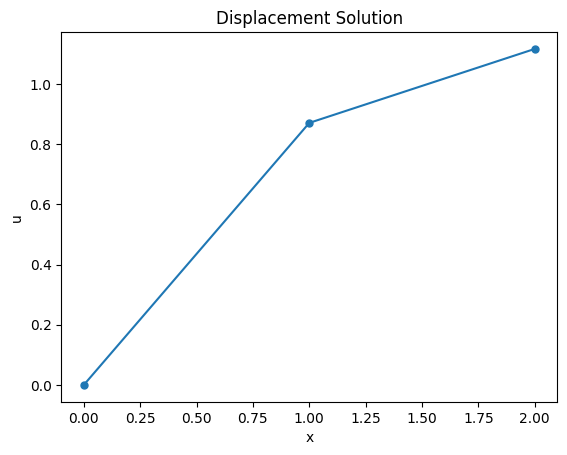

In [40]:
import matplotlib.pyplot as plt
U_ur = np.concatenate((U_p,U_f))
#create displacement vector
displacment = np.zeros_like(x)
plt.plot(Xe, U_ur,marker='.',markersize=10)
plt.title("Displacement Solution")
plt.xlabel("x")
plt.ylabel("u")
plt.show()

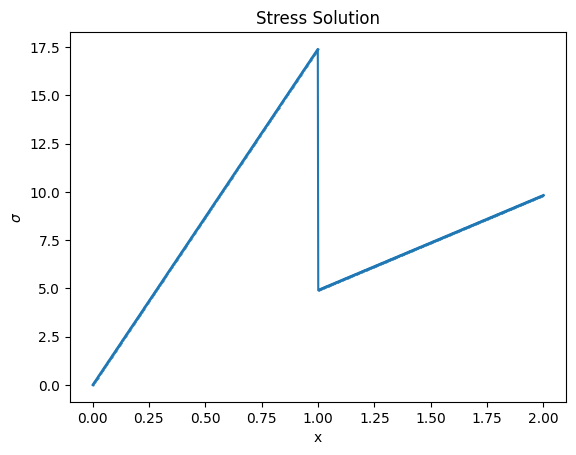

In [45]:
#create stress vector
strain_e = U_ur[1:] - U_ur[:-1]
x = np.linspace(0,2,1000)
element_1_idx = x<=1
element_2_idx = (x<=2)*(x>1)
stress = np.zeros_like(x)
stress[element_1_idx] = strain_e[0]*20*x[element_1_idx]
stress[element_2_idx] = strain_e[1]*20*x[element_2_idx]
plt.plot(x, stress,marker='.',markersize=1)
plt.title("Stress Solution")
plt.xlabel("x")
plt.ylabel("$\sigma$")
plt.show()